## Initial Notebook to Read and Section RSSI Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2022-12-07 14:25:24.637118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 14:25:24.742951: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-07 14:25:24.742967: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-07 14:25:24.762287: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-07 14:25:25.978741: W tensorflow/stream_executor/platform/de

In [2]:
df = pd.read_csv("data/collected_rssi.csv")

In [3]:
dfcorr = df.corr(method ='pearson')[['x', 'y']]
dfcorr

,x,y
D0:4D:C6:02:E5:C0,0.131891,-0.245480
D0:4D:C6:02:95:61,-0.391776,0.306523
D0:4D:C6:02:95:70,-0.176738,0.126001
D0:D3:E0:B1:87:00,0.154169,-0.114550
D0:4D:C6:02:47:F0,-0.110312,0.151977
D0:4D:C6:02:47:E0,-0.028237,0.114121
D0:4D:C6:02:C2:81,0.114544,-0.121478
D0:4D:C6:01:E6:20,0.101325,-0.271332
D0:4D:C6:02:C2:80,0.138287,-0.131309
D0:4D:C6:01:E6:21,0.148922,-0.347088


In [4]:
# Drop values with over 50% zeros
# df.loc[:, (df != 0).mean() > 0.5]
dfcorr[(np.abs(dfcorr['x'] > 0.24)) | (np.abs(dfcorr['y']) > 0.24)]

,x,y
D0:4D:C6:02:E5:C0,0.131891,-0.245480
D0:4D:C6:02:95:61,-0.391776,0.306523
D0:4D:C6:01:E6:20,0.101325,-0.271332
D0:4D:C6:01:E6:21,0.148922,-0.347088
00:4E:35:CF:97:B0,0.433831,-0.397557
D0:4D:C6:01:E6:30,0.219313,-0.511025
D0:4D:C6:02:7E:41,0.213100,-0.351709
D0:4D:C6:03:4D:51,0.211569,-0.314975
D0:4D:C6:01:E6:31,0.175675,-0.435872
00:4E:35:CF:97:B1,0.514079,-0.361607


In [61]:
dftestcol = df[['D0:4D:C6:02:E5:C0', 'D0:4D:C6:02:95:61', 'D0:4D:C6:01:E6:20', 'D0:4D:C6:01:E6:21', 'D0:4D:C6:01:E6:30', 'D0:4D:C6:01:E6:31','x', 'y']]
dftestcol

,D0:4D:C6:02:E5:C0,D0:4D:C6:02:95:61,D0:4D:C6:01:E6:20,D0:4D:C6:01:E6:21,D0:4D:C6:01:E6:30,D0:4D:C6:01:E6:31,x,y
0,43,64,37,33,31,31,1.0,5.0
1,0,69,0,0,0,0,4.0,12.0
2,44,55,32,32,31,31,11.0,4.0
3,0,62,31,0,0,0,5.0,12.0
4,45,64,0,0,0,0,2.0,6.0
...,...,...,...,...,...,...,...,...
281,47,61,31,31,31,31,3.0,7.0
282,0,62,35,35,31,31,5.0,3.0
283,47,59,36,0,31,31,6.0,1.0
284,0,66,31,31,0,0,4.0,12.0


In [62]:
dftest = df.loc[(df['x'] == 5) & (df['y'] == 12)]
dftest2 = df.loc[(df['x'] == 3) & (df['y'] == 3)]

In [63]:
data = dftestcol.iloc[:,:-2].to_numpy() / 70 # This normalizes the RSSI values which are between 0 and 70
labels = dftestcol.iloc[:, -2:].to_numpy() / 12 # This normalizes our x and y which are between 0 and 12

In [64]:
np.shape(data)

(286, 6)

In [65]:
np.shape(labels)

(286, 2)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(data, labels) # May want to use k-folds instead

## Test Network

In [67]:
#very basic model, will need to improve
model=keras.Sequential([
    keras.layers.Dense(20,input_dim=np.shape(data)[1],activation='relu'),
    keras.layers.BatchNormalization(center=True, scale=True),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(2)
])

model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae','mse'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 20)                140       
                                                                 
 batch_normalization_6 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_22 (Dense)            (None, 200)               4200      
                                                                 
 dense_23 (Dense)            (None, 2)                 402       
                                                                 
Total params: 4,822
Trainable params: 4,782
Non-trainable params: 40
_________________________________________________________________


In [68]:
EPOCHS = 700

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.3778,  mae:0.3778,  mse:0.2342,  val_loss:0.3948,  val_mae:0.3948,  val_mse:0.2407,  
....................................................................................................
Epoch: 100, loss:0.1149,  mae:0.1149,  mse:0.0255,  val_loss:0.1636,  val_mae:0.1636,  val_mse:0.0456,  
....................................................................................................
Epoch: 200, loss:0.1119,  mae:0.1119,  mse:0.0245,  val_loss:0.1540,  val_mae:0.1540,  val_mse:0.0486,  
....................................................................................................
Epoch: 300, loss:0.1053,  mae:0.1053,  mse:0.0228,  val_loss:0.1546,  val_mae:0.1546,  val_mse:0.0462,  
....................................................................................................
Epoch: 400, loss:0.1030,  mae:0.1030,  mse:0.0222,  val_loss:0.1632,  val_mae:0.1632,  val_mse:0.0517,  
........................................................................

In [69]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} points".format(mae))

# Note that this is the normalized MAE. So in reality, our actual mae is 1.68 feet

3/3 - 0s - loss: 0.1446 - mae: 0.1446 - mse: 0.0379 - 14ms/epoch - 5ms/step
Testing set Mean Abs Error:  0.14 points


In [70]:
test_predictions = model.predict(x_test)

3/3 [==============================] - 0s 872us/step


In [80]:
len(x_test)

72

In [71]:
# it performed really poorly, but this is a general idea of what we should be doing
print(y_test[:5] * 12)
print(test_predictions[:5] * 12)

[[ 2.  1.]
 [ 4.  3.]
 [ 8.  2.]
 [10.  1.]
 [ 6.  1.]]
[[ 1.8365647  5.6859155]
 [ 2.7443233  3.5768788]
 [ 6.855814   3.1520069]
 [ 8.308836   4.703945 ]
 [11.873579   2.950677 ]]


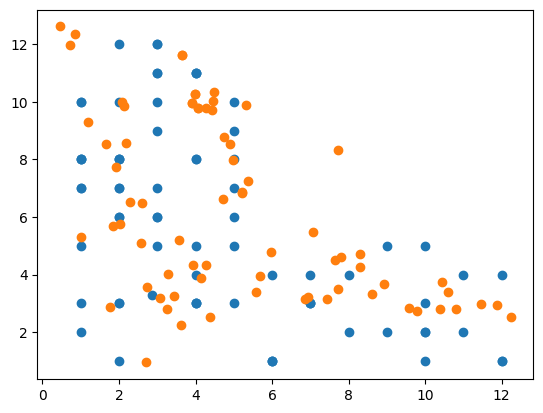

In [72]:
import matplotlib.pyplot as plt
plt.scatter(y_test[:, 0] * 12, y_test[:, 1] * 12)
plt.scatter(test_predictions[:, 0] * 12, test_predictions[:, 1] * 12)
plt.show()

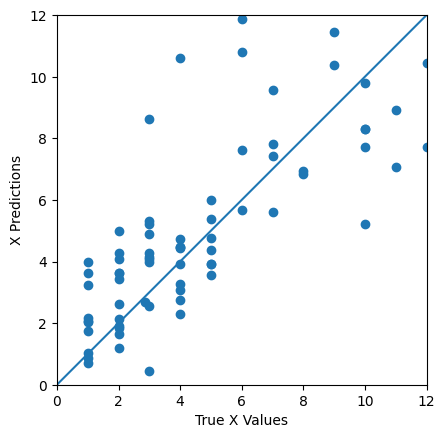

In [78]:
test_predictionsx = test_predictions[:, 0] * 12

a = plt.axes(aspect='equal')
plt.scatter(y_test[:, 0] * 12, test_predictionsx)
plt.xlabel('True X Values')
plt.ylabel('X Predictions')
lims = [0, 12]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


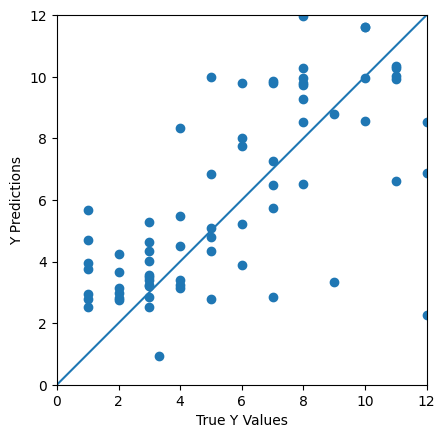

In [79]:
test_predictionsy = test_predictions[:, 1] * 12

a = plt.axes(aspect='equal')
plt.scatter(y_test[:, 1] * 12, test_predictionsy)
plt.xlabel('True Y Values')
plt.ylabel('Y Predictions')
lims = [0, 12]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [74]:
# this site may be useful in the future: https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/

In [75]:
model.save('path/to/location/saved_model.h5')

In [76]:
df.columns

Index(['D0:4D:C6:02:E5:C0', 'D0:4D:C6:02:95:61', 'D0:4D:C6:02:95:70',
       'D0:D3:E0:B1:87:00', 'D0:4D:C6:02:47:F0', 'D0:4D:C6:02:47:E0',
       'D0:4D:C6:02:C2:81', 'D0:4D:C6:01:E6:20', 'D0:4D:C6:02:C2:80',
       'D0:4D:C6:01:E6:21', 'D0:4D:C6:02:D3:A0', 'D0:4D:C6:02:7E:50',
       '00:4E:35:CF:97:B0', 'D0:D3:E0:B1:3A:71', 'D0:D3:E0:B1:3A:60',
       'D0:4D:C6:02:C2:91', 'D0:4D:C6:02:7E:51', 'D0:4D:C6:02:C2:90',
       'D0:4D:C6:01:E6:30', 'D0:4D:C6:02:7E:41', '00:4E:35:CF:97:A1',
       'D0:4D:C6:03:4D:51', 'D0:4D:C6:01:E6:31', '00:4E:35:CF:97:B1',
       'D0:4D:C6:02:7E:40', 'D0:4D:C6:02:47:E1', 'D0:D3:E0:B1:A0:00',
       'D0:4D:C6:03:4D:41', 'D0:4D:C6:02:E5:C1', '00:4E:35:CF:97:A0',
       '00:4E:35:CF:2E:50', '00:4E:35:CF:CE:20', 'D0:D3:E0:B1:3A:61',
       '00:4E:35:CF:2E:51', 'D0:4D:C6:02:47:F1', '00:4E:35:CF:2E:41',
       'D0:4D:C6:02:95:60', '40:E3:D6:24:25:32', 'D0:4D:C6:03:4D:40',
       '40:E3:D6:24:25:33', 'D0:4D:C6:03:4D:50', 'D0:4D:C6:02:E5:D1',
       'D0:D3:E0:B1: